### SSA Analysis

In [ ]:
"""
  Problem Statement:
    (Baby_Names.zip)
    The United States Social Security Administration (SSA) has made available 
    data on the frequency of baby names from 1880 through the 2010. 
    (Use Baby_Names.zip from Resources)  
    
    1.Read data from all the year files starting from 1880 to 2010, 
    2.Add an extra column named as year that contains year of that particular data
    3.Concatinate all the data to form single dataframe using pandas concat method
    4.Display the top 5 male and female baby names of 2010
    5.Calculate sum of the births column by sex as the total number of births 
      in that year(use pandas pivot_table method)
    6.Plot the results of the above activity to show total births by sex and year  
"""
import os
os.remove(r'pd_csv\baby_data.csv')


In [9]:
#1.Read data from all the year files starting from 1880 to 2010

import pandas as pd

list1=range(1880,2018)
list_year=[]
fp=open(r'pd_csv\baby_data.csv','a')
for i in list1:
    f=open(r'babies_names\yob'+str(i)+'.txt','r')
    fp.write(f.read())
    f=open(r'babies_names\yob'+str(i)+'.txt','r')
    data=f.readlines()
    year=len(data)*[i]
    list_year.extend(year)
    f.close()
fp.close()    


In [10]:
df=pd.read_csv(r'pd_csv\baby_data.csv',names=['name','sex','count'])
df

,name,sex,count
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1924660,Zykai,M,5
1924661,Zykeem,M,5
1924662,Zylin,M,5
1924663,Zylis,M,5


In [11]:
#2.Add an extra column named as year that contains year of that particular data
df['year']=list_year
df

,name,sex,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1924660,Zykai,M,5,2017
1924661,Zykeem,M,5,2017
1924662,Zylin,M,5,2017
1924663,Zylis,M,5,2017


In [31]:
#4.Display the top 5 male and female baby names of 2010
df2= df[ df['year']==2010 ]

df2[ df2['sex']=='M' ].head()

,name,sex,count,year
1677731,Jacob,M,22117,2010
1677732,Ethan,M,18000,2010
1677733,Michael,M,17342,2010
1677734,Jayden,M,17171,2010
1677735,William,M,17048,2010


In [32]:
df2[ df2['sex']=='F' ].head()

,name,sex,count,year
1657920,Isabella,F,22905,2010
1657921,Sophia,F,20639,2010
1657922,Emma,F,17338,2010
1657923,Olivia,F,17022,2010
1657924,Ava,F,15429,2010


In [51]:
#5.Calculate sum of the births column by sex as the total number of births 
#  in that year(use pandas pivot_table method)
birth= df.pivot_table(['count'], ['year'], aggfunc='sum')
birth

,count
year,
1880,201484
1881,192696
1882,221533
1883,216946
1884,243462
...,...
2013,3637310
2014,3696311
2015,3688687


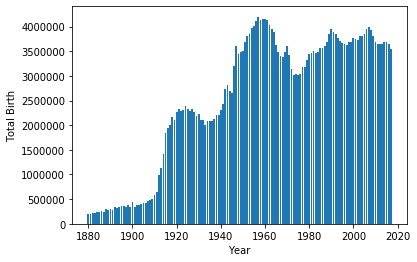

In [54]:
#6.Plot the results of the above activity to show total births by sex and year  

import matplotlib.pyplot as plt

plt.bar(birth.index, birth['count'])
plt.xlabel('Year')
plt.ylabel('Total Birth')
plt.show()
